In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
import logging
from ipywidgets import GridspecLayout
import ipywidgets as widget


logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)


warnings.simplefilter(action='ignore', category=UserWarning)

%matplotlib inline

In [2]:
np.random.seed(42)
cd = pd.read_csv("data/full_einstein_25col.csv")
pd.set_option('max_columns', None)

In [3]:
cd_date = cd.drop("ID", axis=1)
cd.drop("Date", axis=1, inplace=True)
cd.drop("ID", axis=1, inplace=True)
cd.rename(columns={'y':'Target'}, inplace=True)
cd['Sex'].replace(['F','M'],[0,1],inplace=True)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = cd.drop("Target", axis=1)
y = cd["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

## Metric scores

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_preds = clf.predict(X_test)


print("Classifier metrics on the test set:")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")

Classifier metrics on the test set:
Accurracy: 89.89%
Precision: 74.06%
Recall: 39.35%


##  Confusion matrix to summarize predictions

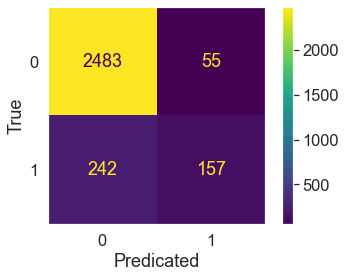

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

j = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=clf.classes_)
j.plot()

plt.grid(False)
plt.xlabel("Predicated")
plt.ylabel("True");

## Heat matrix of blood count sample variables

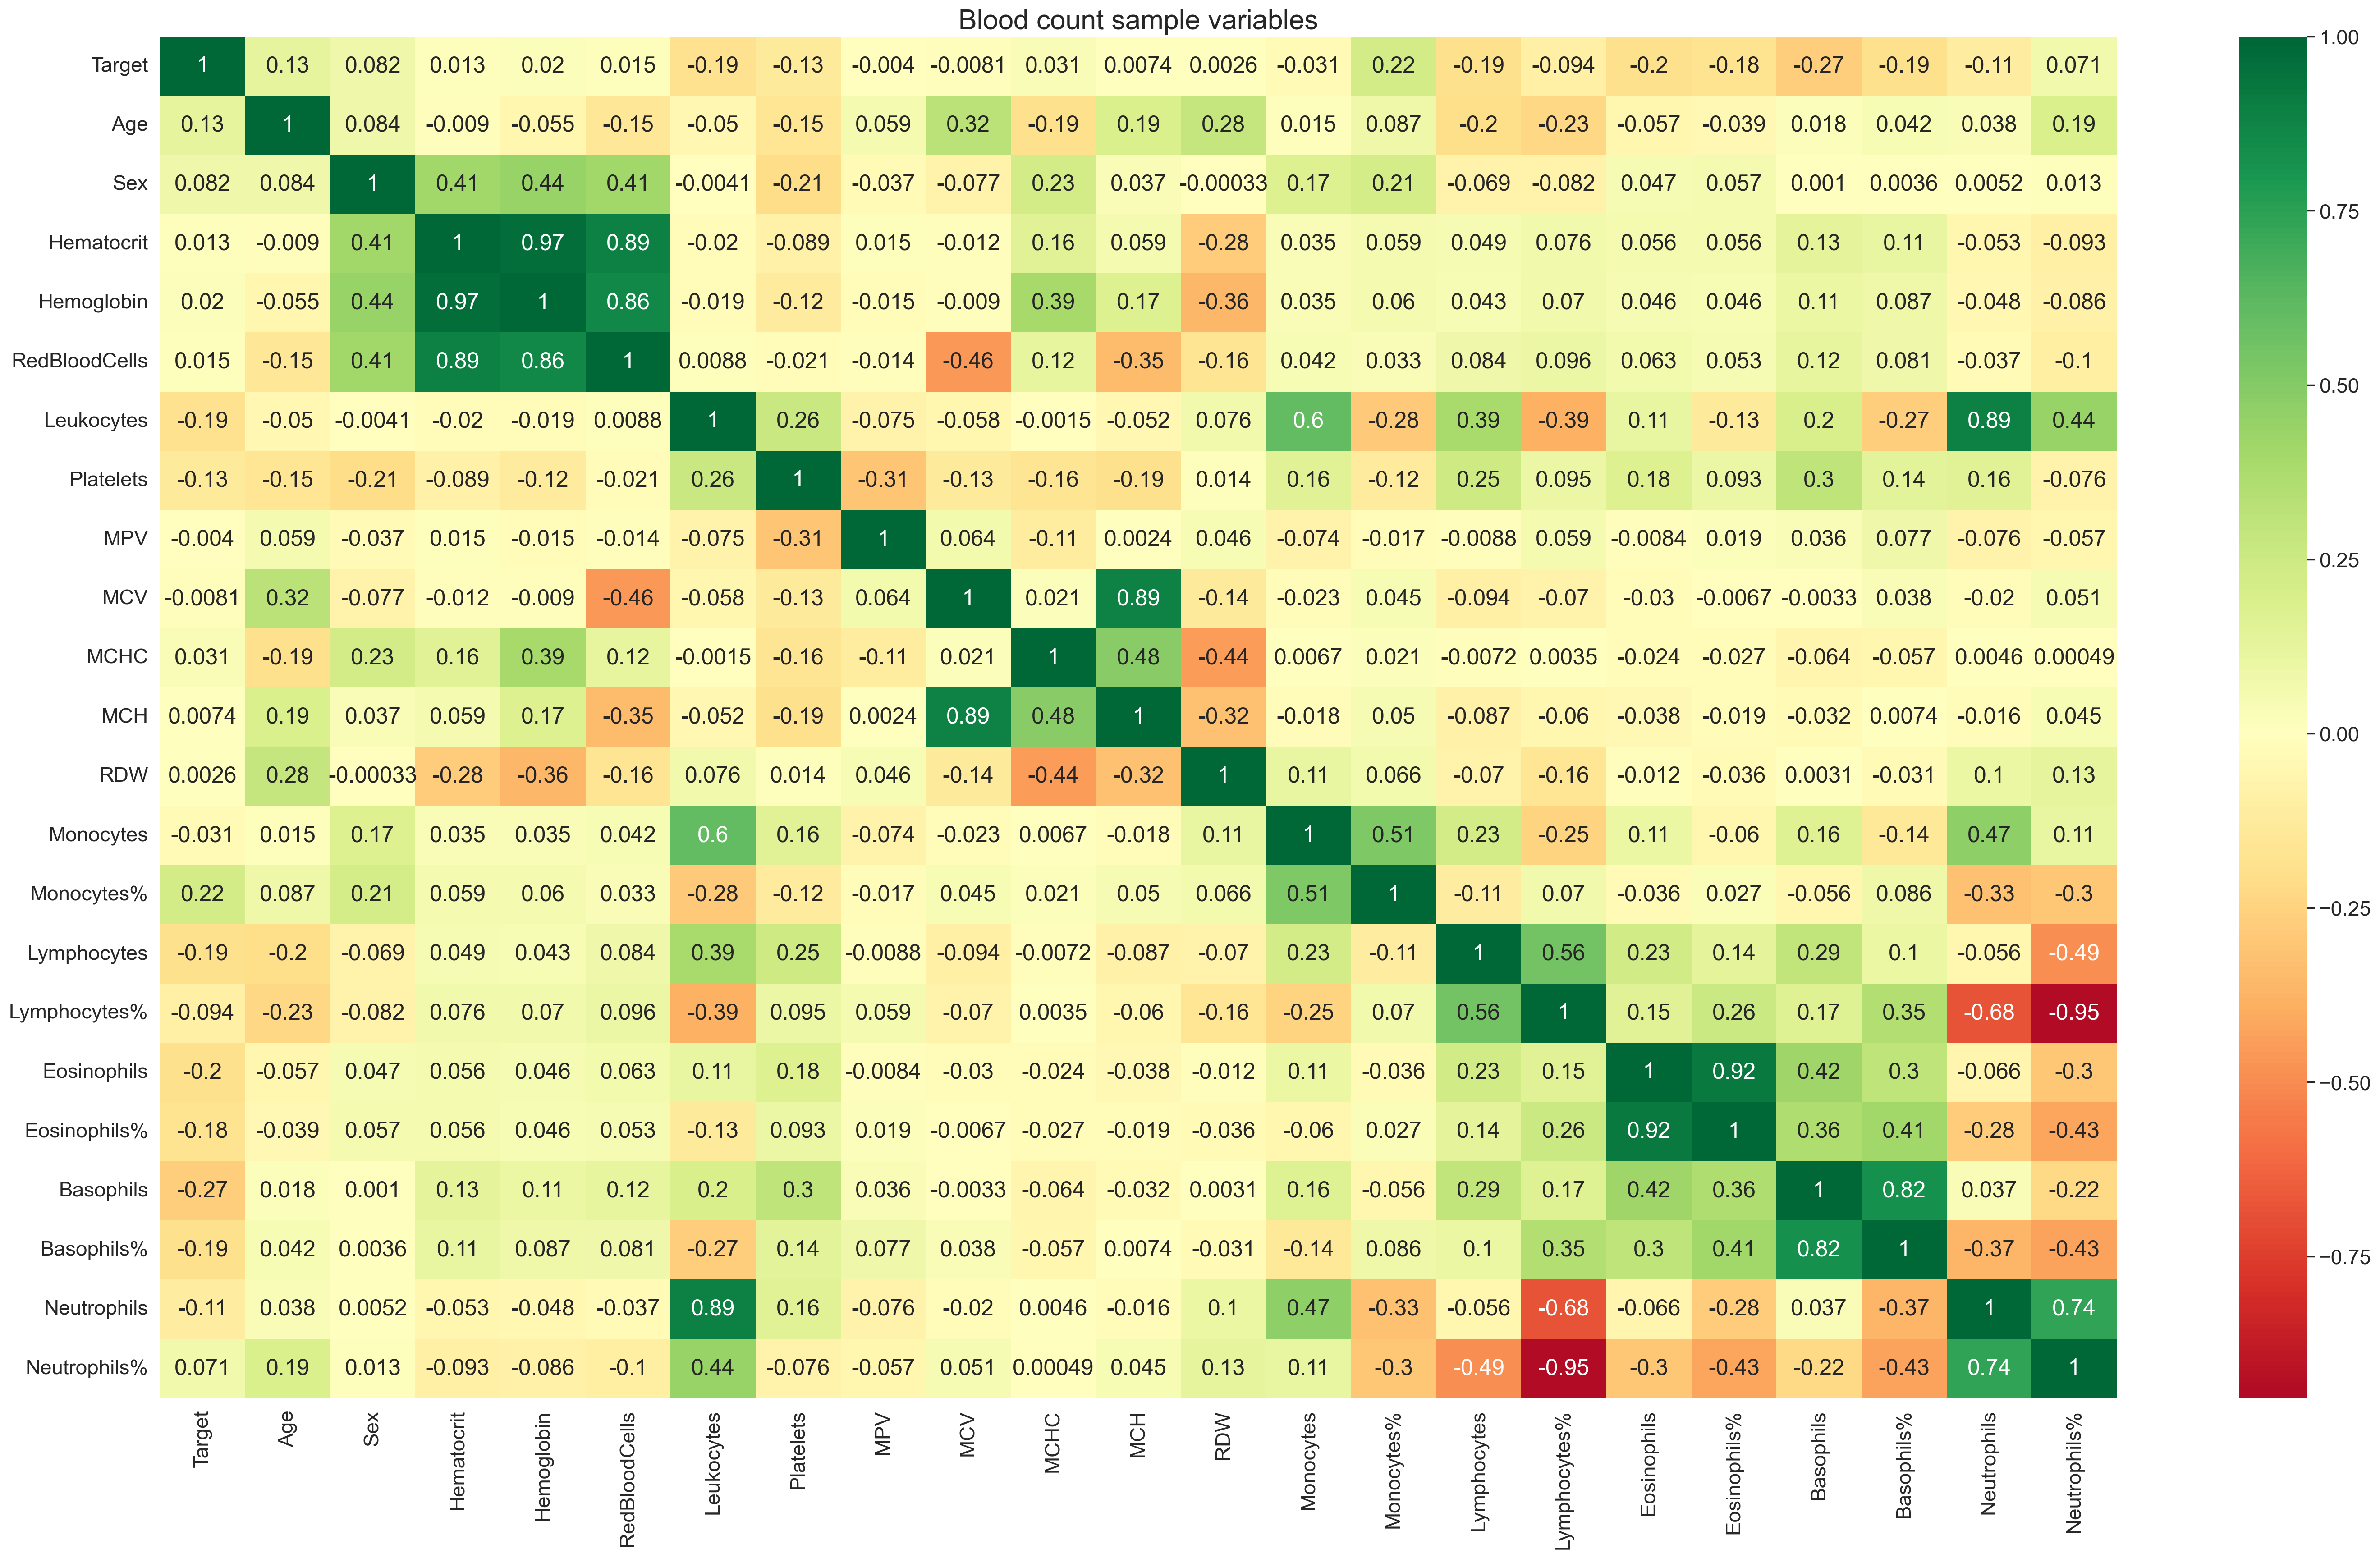

In [7]:
plt.figure(figsize=(35,20), dpi= 200)
sns.heatmap(cd.corr(), xticklabels=cd.corr().columns, yticklabels=cd.corr().columns, cmap='RdYlGn', center=0, annot=True)
sns.set(font_scale=1.4)
plt.title('Blood count sample variables', fontsize=22)

plt.show()

## Histogram of patient's ages

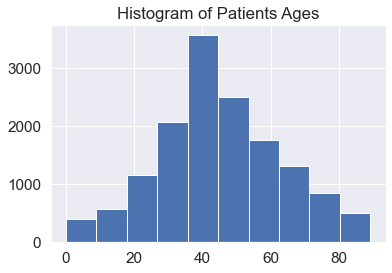

In [8]:
plt.hist(x=cd_date["Age"])
plt.title("Histogram of Patients Ages")
plt.show()

## Create and dispaly widget that provides:
###  - Dropdown of columns in the dataset
###  - A sample of the dataset

In [9]:
import click
from IPython.display import clear_output
from IPython.core.display import display, HTML



button = widget.Button(description="Column Info")
dropdown = widget.Dropdown(options=['Age','Sex','Hematocrit','Hemoglobin','RedBloodCells','Leukocytes','Platelets','MPV','MCV','MCHC','MCH','RDW','Monocytes','Monocytes%','Lymphocytes','Lymphocytes%','Eosinophils','Eosinophils%','Basophils','Basophils%','Neutrophils','Neutrophils%'])
output1 = widget.Output()



print("Select a dataset variable to learn more about its statistics")
display(widget.HBox((dropdown, button)))
display(output1)


def on_button_clicked(b):
    with output1:
        clear_output(wait=True)
        print("Min: ",X[dropdown.value].min()," ","Max: ", X[dropdown.value].max() )
        print(f"Mean: {X[dropdown.value].mean():.2f}")
        print(f"Median: {X[dropdown.value].median():.2f}")
        print("Mode: ", X[dropdown.value].mode().iat[0])
        print("Data Type:", X[dropdown.value].dtype)
        

button.on_click(on_button_clicked)





X.sample(n=3).sort_index()

Select a dataset variable to learn more about its statistics


Output()

,Age,Sex,Hematocrit,Hemoglobin,RedBloodCells,Leukocytes,Platelets,MPV,MCV,MCHC,MCH,RDW,Monocytes,Monocytes%,Lymphocytes,Lymphocytes%,Eosinophils,Eosinophils%,Basophils,Basophils%,Neutrophils,Neutrophils%
2950,53.5,0,35.2,12.0,3.79,4.82,170,10.0,92.9,34.1,31.7,11.8,578,12.0,930,19.3,72,1.5,10,0.2,3210,66.6
3595,36.5,0,36.5,12.6,3.99,3.33,206,10.0,91.5,34.5,31.6,12.7,260,7.8,1469,44.1,80,2.4,30,0.9,1492,44.8
10921,33.0,0,39.9,13.7,4.70,9.18,322,9.3,84.9,34.3,29.1,12.0,514,5.6,2010,21.9,83,0.9,46,0.5,6527,71.1


## User inputted prediction from a blood count sample
### - Adjust or enter in values in the parameters
### - Press the Prediction button to get a COVID infection prediction based on the values
### - Press the Reset button to reset the values' medians and clear the prediction results

In [10]:
print("*PREDICTION* - The model will predict either COVID: 0 - Negative OR 1 - Positive")
print(" ")

output2 = widget.Output()


button_pred = widget.Button(
        description="Prediction")

button_reset = widget.Button(
        description="Reset")


age = widget.BoundedFloatText(
    value = X["Age"].median(),
    min = X["Age"].min(),
    max = 122,
    step = 0.1,
    description="Age",
    disabled=False

)

sex = widget.RadioButtons(
    options=["0 - Female", "1 - Male"],
    description='Sex:',
    disabled=False
)

hematocrit = widget.BoundedFloatText(
    value = X["Hematocrit"].median(),
    min = X["Hematocrit"].min(),
    max = X["Hematocrit"].max(),
    step = 0.01,
    description="Hematocrit",
    disabled=False

)

hemoglobin = widget.BoundedFloatText(
    value = X["Hemoglobin"].median(),
    min = X["Hemoglobin"].min(),
    max = X["Hemoglobin"].max(),
    step = 0.01,
    description="Hemoglobin",
    disabled=False

)

red_blood_cells = widget.BoundedFloatText(
    value = X["RedBloodCells"].median(),
    min = X["RedBloodCells"].min(),
    max = X["RedBloodCells"].max(),
    step = 0.01,
    description="RedBloodCells",
    disabled=False

)

leukocytes = widget.BoundedFloatText(
    value = X["Leukocytes"].median(),
    min = X["Leukocytes"].min(),
    max = X["Leukocytes"].max(),
    step = 0.01,
    description="Leukocytes",
    disabled=False

)

platelets = widget.BoundedIntText(
    value = X["Platelets"].median(),
    min = X["Platelets"].min(),
    max = X["Platelets"].max(),
    step = 1,
    description="Platelets",
    disabled=False

)

mpv = widget.BoundedFloatText(
    value = X["MPV"].median(),
    min = X["MPV"].min(),
    max = X["MPV"].max(),
    step = 0.1,
    description="MPV",
    disabled=False

)

mcv = widget.BoundedFloatText(
    value = X["MCV"].median(),
    min = X["MCV"].min(),
    max = X["MCV"].max(),
    step = 0.1,
    description="MCV",
    disabled=False

)

mchc = widget.BoundedFloatText(
    value = X["MCHC"].median(),
    min = X["MCHC"].min(),
    max = X["MCHC"].max(),
    step = 0.1,
    description="MCHC",
    disabled=False

)

mch = widget.BoundedFloatText(
    value = X["MCH"].median(),
    min = X["MCH"].min(),
    max = X["MCH"].max(),
    step = .1,
    description="MCH",
    disabled=False

)

rdw = widget.BoundedFloatText(
    value = X["RDW"].median(),
    min = X["RDW"].min(),
    max = X["RDW"].max(),
    step = 0.1,
    description="RDW",
    disabled=False

)

monocytes = widget.BoundedIntText(
    value = X["Monocytes"].median(),
    min = X["Monocytes"].min(),
    max = X["Monocytes"].max(),
    step = 1,
    description="Monocytes",
    disabled=False

)

monocytes_perct = widget.BoundedFloatText(
    value = X["Monocytes%"].median(),
    min = X["Monocytes%"].min(),
    max = X["Monocytes%"].max(),
    step = 0.1,
    description="Monocytes%",
    disabled=False

)

lymphocytes = widget.BoundedFloatText(
    value = X["Lymphocytes"].median(),
    min = X["Lymphocytes"].min(),
    max = X["Lymphocytes"].max(),
    step = 1,
    description="Lymphocytes",
    disabled=False

)

lymphocytes_perct = widget.BoundedFloatText(
    value = X["Lymphocytes%"].median(),
    min = X["Lymphocytes%"].min(),
    max = X["Lymphocytes%"].max(),
    step = 0.1,
    description="Lymphocytes%",
    disabled=False

)

eosinophils = widget.BoundedIntText(
    value = X["Eosinophils"].median(),
    min = X["Eosinophils"].min(),
    max = X["Eosinophils"].max(),
    step = 1,
    description="Eosinophils",
    disabled=False

)

eosinophils_perct = widget.BoundedFloatText(
    value = X["Eosinophils%"].median(),
    min = X["Eosinophils%"].min(),
    max = X["Eosinophils%"].max(),
    step = 0.1,
    description="Eosinophils%",
    disabled=False

)

basophils = widget.BoundedIntText(
    value = X["Basophils"].median(),
    min = X["Basophils"].min(),
    max = X["Basophils"].max(),
    step = 1,
    description="Basophils",
    disabled=False

)

basophils_perct = widget.BoundedFloatText(
    value = X["Basophils%"].median(),
    min = X["Basophils%"].min(),
    max = X["Basophils%"].min(),
    step = 0.1,
    description="Basophils%",
    disabled=False

)

neutrophils = widget.BoundedIntText(
    value = X["Neutrophils"].median(),
    min = X["Neutrophils"].min(),
    max = X["Neutrophils"].max(),
    step = 1,
    description="Neutrophils",
    disabled=False

)

neutrophils_perct = widget.BoundedFloatText(
    value = X["Neutrophils%"].median(),
    min = X["Neutrophils%"].min(),
    max = X["Neutrophils%"].min(),
    step = 0.1,
    description="Neutrophils%",
    disabled=False

)




grid = GridspecLayout(9, 3)# fill it in with widgets
grid[0, 0] = age
grid[0, 1] = sex
grid[0, 2] = hematocrit
grid[1, 0] = hemoglobin
grid[1, 1] = red_blood_cells
grid[1, 2] = leukocytes
grid[2, 0] = platelets
grid[2, 1] = mpv
grid[2, 2] = mcv
grid[3, 0] = mchc
grid[3, 1] = mch
grid[3, 2] = rdw
grid[4, 0] = monocytes
grid[4, 1] = monocytes_perct
grid[4, 2] = lymphocytes
grid[5, 0] = lymphocytes_perct
grid[5, 1] = eosinophils
grid[5, 2] = eosinophils_perct
grid[6, 0] = basophils
grid[6, 1] = basophils_perct
grid[6, 2] = neutrophils
grid[7, 0] = neutrophils_perct
grid[7, 1] = button_pred
grid[7, 2] = button_reset
grid[8, 1] = output2










display(grid)

valueList = []

def on_button_click(c):
    with output2:
        valueList=[]
        clear_output(wait=True)
        valueList.append(age.value)
        valueList.append(int(sex.value[0]))
        valueList.append(hematocrit.value)
        valueList.append(hemoglobin.value)
        valueList.append(red_blood_cells.value)
        valueList.append(leukocytes.value)
        valueList.append(platelets.value)
        valueList.append(mpv.value)
        valueList.append(mcv.value)
        valueList.append(mchc.value)
        valueList.append(mch.value)
        valueList.append(rdw.value)
        valueList.append(monocytes.value)
        valueList.append(monocytes_perct.value)
        valueList.append(lymphocytes.value)
        valueList.append(lymphocytes_perct.value)
        valueList.append(eosinophils.value)
        valueList.append(eosinophils_perct.value)
        valueList.append(basophils.value)
        valueList.append(basophils_perct.value)
        valueList.append(neutrophils.value)
        valueList.append(neutrophils_perct.value)



        blood_sample = np.array(valueList).reshape(1,-1)
        if clf.predict(blood_sample) == [0]:
            print("COVID negative")
            print("COVID [Target] Prediction = ", clf.predict(blood_sample))

        else:
            print("COVID positive")
            print("COVID [Target] Prediction = ", clf.predict(blood_sample))



def on_button_click2(d):
    with output2:
        valueList=[]
        clear_output()
        age.value = X["Age"].median()
        sex.value = "0 - Female"
        hematocrit.value = X["Hematocrit"].median()
        hemoglobin.value = X["Hemoglobin"].median() 
        red_blood_cells.value = X["RedBloodCells"].median() 
        leukocytes.value = X["Leukocytes"].median() 
        platelets.value = X["Platelets"].median() 
        mpv.value = X["MPV"].median()
        mcv.value = X["MCV"].median() 
        mchc.value = X["MCHC"].median() 
        mch.value = X["MCH"].median() 
        rdw.value = X["RDW"].median() 
        monocytes.value = X["Monocytes"].median() 
        monocytes_perct.value = X["Monocytes%"].median() 
        lymphocytes.value = X["Lymphocytes"].median() 
        lymphocytes_perct.value = X["Lymphocytes%"].median() 
        eosinophils.value = X["Eosinophils"].median() 
        eosinophils_perct.value = X["Eosinophils%"].median() 
        basophils.value = X["Basophils"].median() 
        basophils_perct.value = X["Basophils%"].median() 
        neutrophils.value = X["Neutrophils"].median() 
        neutrophils_perct.value = X["Neutrophils%"].median() 
            
        


        
button_pred.on_click(on_button_click)
button_reset.on_click(on_button_click2)







*PREDICTION* - The model will predict either COVID: 0 - Negative OR 1 - Positive
 


GridspecLayout(children=(BoundedFloatText(value=43.5, description='Age', layout=Layout(grid_area='widget001'),…

## You may exit now or revist any cell within this program